## Understanding the Problem and Objective

Build a model to predict the type of customers who will purchase our bookkeeping product in the future.


**Assumptions about the Bookkeeping Product:** 
- Subscription-based product 
- Product features:
    - Automated Real-Time Bookkeeping
    - Unlimited Transactions
    - Bill Pay
    - Payroll Management
    - Invoicing
- Product cost: $499/month
    
- Customers can be organizations and companies

### 1. Key pieces of information I would need to predict this?

- **Company Size:** The size of a company plays a vital role in determining the complexities of the financial tasks, and therefore, can be a good indicator for their need of a bookkeeping product. Companies in their infancy that have 1-50 employees can manually enter and calculate the records of their business financial activities, and are less likely to invest in a bookkeeping product. However, as the business garners more customers, the functionalities in the company increases along with their need for automated bookkeeping. Therefore, company size, coupled with other features, can serve as basis in determining the type of customers that will buy the bookkeeping product. *Extra:* We can also create a new feature that can assign a business to three categories--micro, small, medium-sized--based on the numbers of employees in their company. And then convert those values to numerical values using label encoding for our model to interpret.


- **Total Transactions (in the past month):** One of the most important feature of a bookkeeping product is its ability to keep record of the number of transactions. A business with few transactions will not feel the need to invest in the product as doing these tasks manually are feasible. On the other hand, a business with a high volume of transactions will need the product to rid them from the tedious task of manually entering all the transactions. Therefore, companies with many transactions are more likely to purchase the product.


- **Profit:** Profit is an important measure of a business health and success. If a company is not profitable, then it will not be able to afford the bookkeeping product. On the other hand, a profitable business is more likely to invest in the product.


- **Number of Bills and Invoices (in the past month):** Companies do no want to be burdened with paying bills or sending out invoices everyday. In addition, paying bill on time and getting payments is also important to maintain good standing. A company with large number of bills and invoices can utilize the feature in the bookkeeping product to suite their business needs.


- **Current/Previous Bookkeeping Product:** A customer can be reluctant to switch from their accustomed bookkeeping product to a new product. However, a seamless transition will save customers the time and hassle, giving them the confidence to purchase the new product. For example, the new products smooth integration with Xero and Quickbooks Online might have a significant effect on the customers decision to switch to the product. *Since this is a categorical feature, we will convert the values using one-hot encoding or label encoding.*

### 2. How would you like the data structured?

Here is an illustration of how I would like the data in tabular format:

**An illustration**

In [45]:
import pandas as pd
customer = pd.DataFrame({'Name': ["AT", "SouthPole", "Nike"],
                         'Transactions in the past month':[10,29,100],
                         'Profit': [200.5,400.36,1000],
                         'Bills': [52,20,75],
                         'Invoices': [12,56,52],
                         'Total Employees': [4,50,100],
                         'Current Bookkeeping Service': ['Xero', 'QuickBooks Online', 'NA'],
                        })

customer['encoded_BKserv'] = customer['Current Bookkeeping Service'].map({'Xero':1, 'QuickBooks Online':2, 'NA':0})
customer

,Bills,Current Bookkeeping Service,Invoices,Name,Profit,Total Employees,Transactions in the past month,encoded_BKserv
0,52,Xero,12,AT,200.50,4,10,1
1,20,QuickBooks Online,56,SouthPole,400.36,50,29,2
2,75,NA,52,Nike,1000.00,100,100,0


Even if the data does not adhere to the requested data types, I can parse it and store it for our machine learning model to understand.

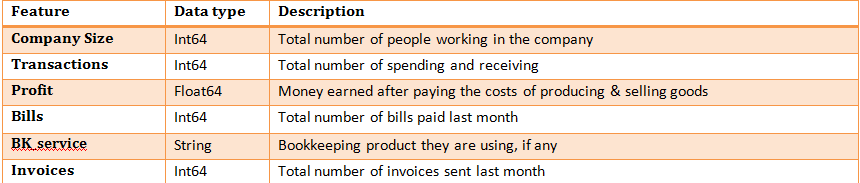

In [46]:
from IPython.display import Image
Image(filename='SF/data.png') 

### 3. Follow up questions?

1) **Building Flexible Machine Learning Pipeline:** Data Science problems evolve as the company faces new challenges. An objective of predicting what type of customers will purchase a bookkeeping product can instantly change to predicting what type of customers will *continue* to buy our bookkeeping product. As a result, the labels created for the initial problem are no longer going to be applicable to new business problem. Due to hard-coding a specific set of values, we will have to rebuild an entirely new pipeline to address what is only a small change in problem definition. Knowing that the problem will change in the future will allow me to create a pipeline that can be quickly adapted and deployed as parameters to a problem change. ***Question to ask:*** *How will you determine which customers will continue to buy your bookkeeping product in the future?* Suggestions: In this case, the business challenge is now defined as increasing monthly active subscribers by reducing the rate of churn. The machine learning problem is building a model to predict which customers will churn using historical data.

2) **Customer Segmentation:** Many companies offer a variety of bookkeeping products. For example, ScaleFactor's software is available in three variants: bookkeeping for getting started, growing business, and scaling business. It is crucial to understand customer behavior and categorize customers based on their business needs. Small size companies might prefer the getting started option, while a big size company can prefer scaling business option. Therefore, we can be interested in finding which customers will buy a specific product. This is a critical aspect of customer segmentation that will also allow marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing, and product development strategies. ***Question to ask:*** *What other purpose will this model serve? How will the results be used? (invest in product category, identify risks, etc)*

3) **Quality of Data:** It is crucial to understand the data we are provided. A dataset that contains customers from 10 years ago can have different dynamics from the customers today. For example, small companies 10 years ago might manually do bookkeeping, whereas small companies today would use a bookkeeping product. This can also introduce another problem: The train data and test data come from different distribution. If a test set and train set is different, then we cannot use validation set because it will not be representative of test set. Therefore, we cannot evaluate our model using it. ***Question to ask:*** *How was the data collected? What data sources are available to work with?*

### Demonstration of how to determine the type of customers using 2 features

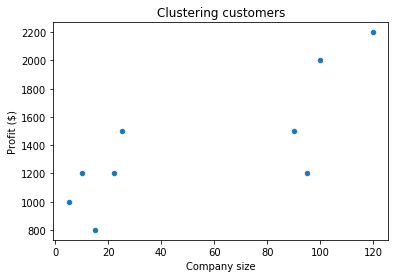

In [42]:
k = pd.DataFrame({'Company size': [5,10,15,25,22,95,90,100,120],
                 'Profit ($)': [1000,1200,800,1500,1200,1200,1500,2000,2200] })
k.plot(x = 'Company size', y = 'Profit ($)', kind = 'scatter', title = 'Clustering customers')

As can be seen from the above graph, we can divide customers into two segments:

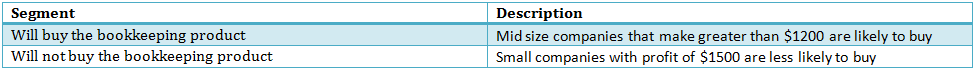

In [44]:
from IPython.display import Image
Image(filename='SF/segment.png') 